# <div align='center'> Handwritten Digit Clasiffication Using PyTorch</div>

<div align='center'>Here I shall be reimplementing the same <i>Vanila Neural-Network</i> that I did in my previous notebook here in <i>Pytorch.</i></div>

In [1]:
import numpy as np
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from keras.utils import to_categorical
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


### Downloading and Normalizing the Data

In [2]:
# Transformations to be applied to the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the Training data
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1, shuffle=True)

# Download and load the Test data
testset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1, shuffle=True)

<div align='center'>Each image is 28x28 pixels, you can see a sample below</div>

![img](./mnist.png)

### Model

In [15]:
Input_Nodes = 784
Hidden_Node = 100
Output_Node = 10
epochs = 20
lr = .028

Model1 = nn.Sequential(nn.Linear(Input_Nodes,Hidden_Node),
                       nn.Sigmoid(),
                       nn.Linear(Hidden_Node,Output_Node),
                       nn.Sigmoid()
                      )
print(Model1)

Sequential(
  (0): Linear(in_features=784, out_features=100, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=100, out_features=10, bias=True)
  (3): Sigmoid()
)


### Cost Function

In [4]:
#ie the Error Function
CostFn = nn.MSELoss()

### Training and Validating Phase

Epoch: 1/20..  Training Loss: 0.042..  Test Loss: 0.021..  Test Accuracy: 89.490
Epoch: 2/20..  Training Loss: 0.019..  Test Loss: 0.016..  Test Accuracy: 91.090
Epoch: 3/20..  Training Loss: 0.015..  Test Loss: 0.014..  Test Accuracy: 92.150
Epoch: 4/20..  Training Loss: 0.014..  Test Loss: 0.013..  Test Accuracy: 92.530
Epoch: 5/20..  Training Loss: 0.012..  Test Loss: 0.012..  Test Accuracy: 93.380
Epoch: 6/20..  Training Loss: 0.012..  Test Loss: 0.011..  Test Accuracy: 93.640
Epoch: 7/20..  Training Loss: 0.011..  Test Loss: 0.010..  Test Accuracy: 93.860
Epoch: 8/20..  Training Loss: 0.010..  Test Loss: 0.010..  Test Accuracy: 94.240
Epoch: 9/20..  Training Loss: 0.010..  Test Loss: 0.009..  Test Accuracy: 94.620
Epoch: 10/20..  Training Loss: 0.009..  Test Loss: 0.009..  Test Accuracy: 94.840
Epoch: 11/20..  Training Loss: 0.009..  Test Loss: 0.009..  Test Accuracy: 95.020
Epoch: 12/20..  Training Loss: 0.008..  Test Loss: 0.008..  Test Accuracy: 95.340
Epoch: 13/20..  Training 

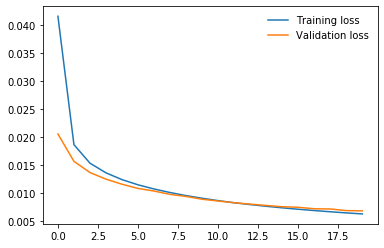

In [16]:
def Train(trainloader,testloader,Model,lr,epoch):
    
    train_losses, test_losses = [], []
    
    optimizer = optim.SGD(Model.parameters(), lr=lr)
    
    for e in range(epoch):
        LossComputed = 0
        for data, labels in trainloader:
            data = data.view(data.shape[0],-1)
            labels = to_categorical(labels,10)
            labels = torch.from_numpy(labels)
            optimizer.zero_grad()
            Model_out = Model(data)
            Loss = CostFn(Model_out,labels)
        
            #BackPropagation
            Loss.backward()
            #Updation_Step
            optimizer.step()
        
            LossComputed += Loss
        else:
            test_loss = 0
            accuracy = 0
        
            # Turn off gradients for validation, saves memory and computations
            with torch.no_grad():
                Model.eval() #Turning off the DropOut layer while Testing
                for images, labels in testloader:
                    images = images.view(images.shape[0],-1)
                    labels = to_categorical(labels,10)
                    labels = torch.from_numpy(labels)
                    predict = Model(images)
                    test_loss += CostFn(predict, labels)
                    top_p, top_class = predict.topk(1, dim=1)
                    top_pt, top_classt = labels.topk(1, dim=1)
                    equals = top_class == top_classt
                    accuracy += torch.mean(equals.type(torch.FloatTensor))     
            
            Model.train()
            
            train_losses.append(LossComputed/len(trainloader))
            test_losses.append(test_loss/len(testloader))

            print("Epoch: {}/{}.. ".format(e+1, epoch),
              "Training Loss: {:.3f}.. ".format(LossComputed/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(test_loss/len(testloader)),
              "Test Accuracy: {:.3f}".format(100*(accuracy/len(testloader))))
            
    # Ploting Training vs Validation Error
    plt.plot(train_losses, label='Training loss')
    plt.plot(test_losses, label='Validation loss')
    plt.legend(frameon=False)
 

Train(trainloader,testloader,Model1,lr,epochs)

In [17]:
''' 
Function for viewing an image and it's predicted classes.
'''
def view_classify(img, ps, version="MNIST"):
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()

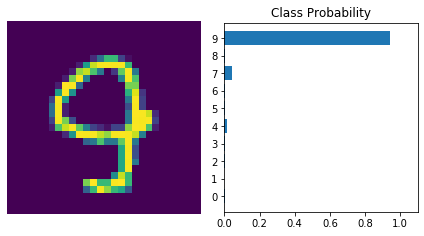

In [27]:

images, labels = next(iter(trainloader))
img = images[0].view(1, 784)
with torch.no_grad():
    ps = Model1(img)
view_classify(img.view(1, 28, 28), ps)